In [1]:
from sklearn.datasets import make_moons

In [2]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(X_moons,y_moons, random_state=1, test_size=0.3)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_tr, y_tr)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [6]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_te)
accuracy_score(y_te, y_pred)

0.867

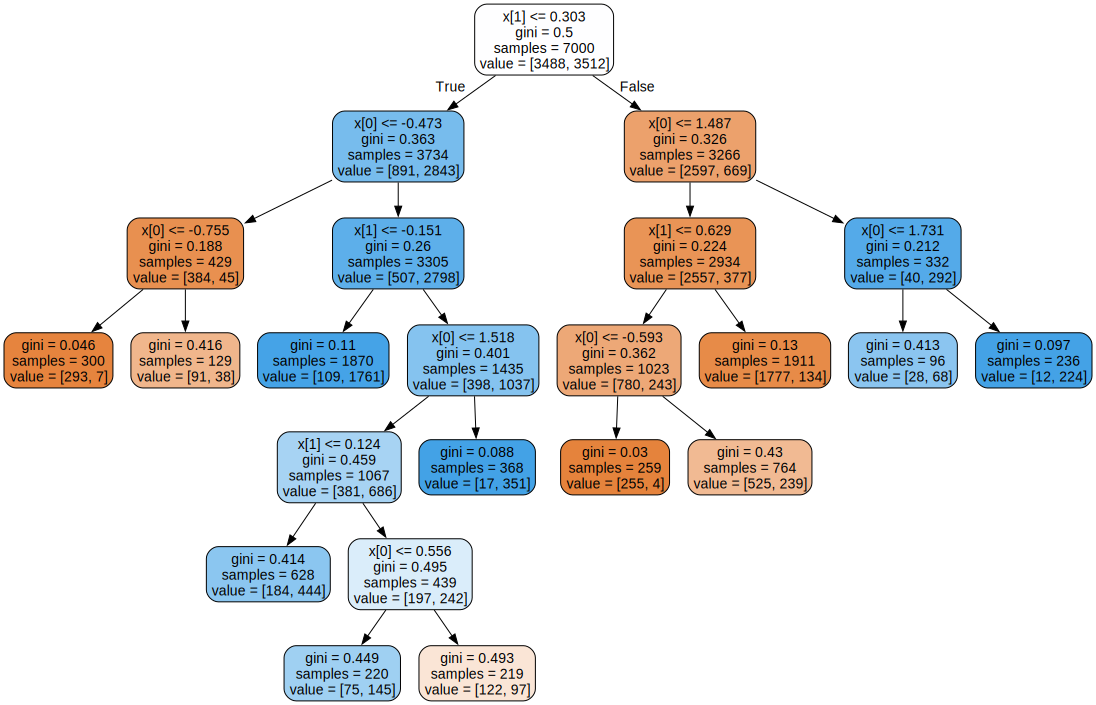

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    grid_search_cv.best_estimator_,
    out_file=str("tree07.dot"),
    rounded=True,
    filled=True
)
Source.from_file("tree07.dot")